# XCV-18573A
### Data：PSA-MFD_(TagList)_20201225rev.1_01

### 1.Pick up Tags<br><br>2.Handle string cell ; "[-11059] No Good Data For Calculation"<br><br>3.Split data to "train data" and "trial data"<br><br>4.Execute ML<br><br>5.Result

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
# change cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ## MSE
from sklearn.metrics import r2_score ## R2
from sklearn.model_selection import KFold

In [5]:
import matplotlib.pyplot as plt
import pickle

In [6]:
PROJECT_PATH = os.getcwd()  ##current directory

In [7]:
df_PAS_all_tags = pd.read_excel(PROJECT_PATH + "\\Data\\PSA-MFD_(TagList)_20201225rev.1_01.xlsx", encoding="shift_jisx0213", index_col=1, header=2)

In [8]:
df_PAS_all_tags_original = df_PAS_all_tags

In [9]:
PROJECT_PATH

'C:\\Users\\AB067\\OneDrive - Chiyoda Corporation\\AIS\\00_Project\\15_装置監視AI\\CPW関連\\仕様書作成\\Attachemnt_sample'

In [10]:
# confirm import data
df_PAS_all_tags.head(5)

,Unnamed: 0,PC_18701.OP,PC_18701.PV,TIA18701.PV,ZI_18701.PV,TX18561A.PV,TX18561B.PV,TX18561C.PV,XCV-18574A,XCV-18574B,...,SC_1872.HS,SC_1872.HZ,SC_1872.I1,SC_1872.I4,X18571AO.PV,X18571BO.PV,X18571CO.PV,X18571DO.PV,X18571EO.PV,X18571FO.PV
2020-12-17 09:01:00,2020-12-17 09:00:00,[-11059] No Good Data For Calculation,0.032510,20.606250,53.630000,20.808333,21.165,21.130555,0.000000,0.0,...,0.1,1.0,0.4,0.4,0,0,0,0,0,1
2020-12-17 09:02:00,2020-12-17 09:01:00,[-11059] No Good Data For Calculation,0.032597,20.639062,53.754530,20.819667,21.175,21.138333,0.000000,0.0,...,0.1,1.0,0.4,0.4,0,0,0,0,0,1
2020-12-17 09:03:00,2020-12-17 09:02:00,[-11059] No Good Data For Calculation,0.032846,20.623750,53.978750,20.831000,21.185,21.146111,0.000000,0.0,...,0.1,1.0,0.4,0.4,1,0,0,0,0,0
2020-12-17 09:04:00,2020-12-17 09:03:00,[-11059] No Good Data For Calculation,0.033155,20.592031,54.248282,20.842333,21.195,21.153889,1.138889,0.0,...,0.1,1.0,0.4,0.4,1,0,0,0,0,0
2020-12-17 09:05:00,2020-12-17 09:04:00,[-11059] No Good Data For Calculation,0.033323,20.632500,54.617501,20.853667,21.205,21.161666,17.083333,0.0,...,0.1,1.0,0.4,0.4,0,1,0,0,0,0


## 1.Pick up Tags 

In [11]:
list_ =[
        "XCV-18573A", #Target
        "XCV-18573B",
        "XCV-18573C",
        "XCV-18573D",
        "XCV-18573E",
        "XCV-18573F",
#         "XCV-18574A",
        "XCV-18574B",
        "XCV-18574C",
        "XCV-18574D",
        "XCV-18574E",
        "XCV-18574F",
#         "XCV-18575A"
        "XCV-18575B",
        "XCV-18575C",
        "XCV-18575D",
        "XCV-18575E",
        "XCV-18575F",
#         "XCV-18578A",
        "XCV-18578B",
        "XCV-18578C",
        "XCV-18578D",
        "XCV-18578E",
        "XCV-18578F",
]

In [12]:
ai_targetTag =["XCV-18573A", #Target
              ]

In [13]:
df_PAS_required_tags = df_PAS_all_tags[list_]

In [14]:
df_PAS_required_tags

,XCV-18573A,XCV-18573B,XCV-18573C,XCV-18573D,XCV-18573E,XCV-18573F,XCV-18574B,XCV-18574C,XCV-18574D,XCV-18574E,...,XCV-18575B,XCV-18575C,XCV-18575D,XCV-18575E,XCV-18575F,XCV-18578B,XCV-18578C,XCV-18578D,XCV-18578E,XCV-18578F
2020-12-17 09:01:00.000,0.000000,0.000000,58.333333,41.666667,3.850000,2.666667,0.000000,58.333333,63.425000,14.500000,...,29.400001,21.666667,0.000000,29.575000,21.791666,4.125000,0.000000,0.000000,0.000000,58.333333
2020-12-17 09:02:00.000,0.208333,0.000000,11.111111,86.111111,3.511111,5.511111,0.000000,11.111111,90.255555,32.744444,...,5.600000,44.777778,1.572222,5.633333,45.036110,11.302777,0.383333,0.000000,0.000000,11.111111
2020-12-17 09:03:00.000,3.125000,0.000000,0.000000,58.333333,41.666667,3.733333,0.000000,0.000000,58.333333,61.966666,...,0.000000,30.333333,23.583333,0.000000,30.508333,47.441666,5.750000,0.000000,0.000000,0.000000
2020-12-17 09:04:00.000,6.458333,0.258333,0.000000,11.111111,86.111111,3.488889,0.000000,0.000000,11.111111,89.977778,...,1.680556,5.777778,48.738888,1.688889,5.811111,87.211111,14.661111,0.427778,0.000000,0.000000
2020-12-17 09:05:00.000,4.375000,3.875000,0.000000,0.000000,58.333333,41.666667,0.000000,0.000000,0.000000,58.333333,...,25.208333,0.000000,33.016666,25.333333,0.000000,58.333333,49.716667,6.416667,0.000000,0.000000
2020-12-17 09:06:00.000,3.611111,8.008333,0.247222,0.000000,11.111111,86.111111,1.105556,0.000000,0.000000,11.111111,...,52.097222,1.694444,6.288889,52.355555,1.702778,11.111111,87.644444,16.038889,0.355556,0.000000
2020-12-17 09:07:00.000,41.666667,5.425000,3.708333,0.000000,0.000000,58.333333,16.583333,0.000000,0.000000,0.000000,...,35.291667,25.416667,0.000000,35.466666,25.541666,0.000000,58.333333,50.650000,5.333333,0.000000
2020-12-17 09:08:00.000,86.111111,3.811111,7.663889,0.208333,0.000000,11.111111,37.049999,1.227778,0.000000,0.000000,...,6.722222,52.527778,1.680556,6.755555,52.786110,0.000000,11.111111,87.822222,13.800000,0.308333
2020-12-17 09:09:00.000,58.333333,41.666667,5.191666,3.125000,0.000000,0.000000,64.883333,18.416667,0.000000,0.000000,...,0.000000,35.583333,25.208333,0.000000,35.758333,0.000000,0.000000,58.333333,49.133333,4.625000
2020-12-17 09:10:00.000,11.111111,86.111111,3.766667,6.458333,0.291667,0.000000,90.533333,40.838890,1.252778,0.000000,...,1.808333,6.777778,52.097222,1.816667,6.811111,0.000000,0.000000,11.111111,87.533333,12.336111


## 2．Handle string cell ; "[-11059] No Good Data For Calculation"

In [15]:
# change "string" to "NaN"
df_PAS_required_removeString = []
for col in df_PAS_required_tags.columns[:]:
    remove_string = pd.to_numeric(df_PAS_required_tags[col], errors='coerce')
    df_PAS_required_removeString.append(remove_string)
    
pd.DataFrame(df_PAS_required_removeString).T

,XCV-18573A,XCV-18573B,XCV-18573C,XCV-18573D,XCV-18573E,XCV-18573F,XCV-18574B,XCV-18574C,XCV-18574D,XCV-18574E,...,XCV-18575B,XCV-18575C,XCV-18575D,XCV-18575E,XCV-18575F,XCV-18578B,XCV-18578C,XCV-18578D,XCV-18578E,XCV-18578F
2020-12-17 09:01:00.000,0.000000,0.000000,58.333333,41.666667,3.850000,2.666667,0.000000,58.333333,63.425000,14.500000,...,29.400001,21.666667,0.000000,29.575000,21.791666,4.125000,0.000000,0.000000,0.000000,58.333333
2020-12-17 09:02:00.000,0.208333,0.000000,11.111111,86.111111,3.511111,5.511111,0.000000,11.111111,90.255555,32.744444,...,5.600000,44.777778,1.572222,5.633333,45.036110,11.302777,0.383333,0.000000,0.000000,11.111111
2020-12-17 09:03:00.000,3.125000,0.000000,0.000000,58.333333,41.666667,3.733333,0.000000,0.000000,58.333333,61.966666,...,0.000000,30.333333,23.583333,0.000000,30.508333,47.441666,5.750000,0.000000,0.000000,0.000000
2020-12-17 09:04:00.000,6.458333,0.258333,0.000000,11.111111,86.111111,3.488889,0.000000,0.000000,11.111111,89.977778,...,1.680556,5.777778,48.738888,1.688889,5.811111,87.211111,14.661111,0.427778,0.000000,0.000000
2020-12-17 09:05:00.000,4.375000,3.875000,0.000000,0.000000,58.333333,41.666667,0.000000,0.000000,0.000000,58.333333,...,25.208333,0.000000,33.016666,25.333333,0.000000,58.333333,49.716667,6.416667,0.000000,0.000000
2020-12-17 09:06:00.000,3.611111,8.008333,0.247222,0.000000,11.111111,86.111111,1.105556,0.000000,0.000000,11.111111,...,52.097222,1.694444,6.288889,52.355555,1.702778,11.111111,87.644444,16.038889,0.355556,0.000000
2020-12-17 09:07:00.000,41.666667,5.425000,3.708333,0.000000,0.000000,58.333333,16.583333,0.000000,0.000000,0.000000,...,35.291667,25.416667,0.000000,35.466666,25.541666,0.000000,58.333333,50.650000,5.333333,0.000000
2020-12-17 09:08:00.000,86.111111,3.811111,7.663889,0.208333,0.000000,11.111111,37.049999,1.227778,0.000000,0.000000,...,6.722222,52.527778,1.680556,6.755555,52.786110,0.000000,11.111111,87.822222,13.800000,0.308333
2020-12-17 09:09:00.000,58.333333,41.666667,5.191666,3.125000,0.000000,0.000000,64.883333,18.416667,0.000000,0.000000,...,0.000000,35.583333,25.208333,0.000000,35.758333,0.000000,0.000000,58.333333,49.133333,4.625000
2020-12-17 09:10:00.000,11.111111,86.111111,3.766667,6.458333,0.291667,0.000000,90.533333,40.838890,1.252778,0.000000,...,1.808333,6.777778,52.097222,1.816667,6.811111,0.000000,0.000000,11.111111,87.533333,12.336111


In [16]:
# remove "NaN" row
df_PAS_required_tags_dropna = pd.DataFrame(df_PAS_required_removeString).T.dropna(how="any", axis=0)
df_PAS_required_tags_dropna

,XCV-18573A,XCV-18573B,XCV-18573C,XCV-18573D,XCV-18573E,XCV-18573F,XCV-18574B,XCV-18574C,XCV-18574D,XCV-18574E,...,XCV-18575B,XCV-18575C,XCV-18575D,XCV-18575E,XCV-18575F,XCV-18578B,XCV-18578C,XCV-18578D,XCV-18578E,XCV-18578F
2020-12-17 09:01:00.000,0.000000,0.000000,58.333333,41.666667,3.850000,2.666667,0.000000,58.333333,63.425000,14.500000,...,29.400001,21.666667,0.000000,29.575000,21.791666,4.125000,0.000000,0.000000,0.000000,58.333333
2020-12-17 09:02:00.000,0.208333,0.000000,11.111111,86.111111,3.511111,5.511111,0.000000,11.111111,90.255555,32.744444,...,5.600000,44.777778,1.572222,5.633333,45.036110,11.302777,0.383333,0.000000,0.000000,11.111111
2020-12-17 09:03:00.000,3.125000,0.000000,0.000000,58.333333,41.666667,3.733333,0.000000,0.000000,58.333333,61.966666,...,0.000000,30.333333,23.583333,0.000000,30.508333,47.441666,5.750000,0.000000,0.000000,0.000000
2020-12-17 09:04:00.000,6.458333,0.258333,0.000000,11.111111,86.111111,3.488889,0.000000,0.000000,11.111111,89.977778,...,1.680556,5.777778,48.738888,1.688889,5.811111,87.211111,14.661111,0.427778,0.000000,0.000000
2020-12-17 09:05:00.000,4.375000,3.875000,0.000000,0.000000,58.333333,41.666667,0.000000,0.000000,0.000000,58.333333,...,25.208333,0.000000,33.016666,25.333333,0.000000,58.333333,49.716667,6.416667,0.000000,0.000000
2020-12-17 09:06:00.000,3.611111,8.008333,0.247222,0.000000,11.111111,86.111111,1.105556,0.000000,0.000000,11.111111,...,52.097222,1.694444,6.288889,52.355555,1.702778,11.111111,87.644444,16.038889,0.355556,0.000000
2020-12-17 09:07:00.000,41.666667,5.425000,3.708333,0.000000,0.000000,58.333333,16.583333,0.000000,0.000000,0.000000,...,35.291667,25.416667,0.000000,35.466666,25.541666,0.000000,58.333333,50.650000,5.333333,0.000000
2020-12-17 09:08:00.000,86.111111,3.811111,7.663889,0.208333,0.000000,11.111111,37.049999,1.227778,0.000000,0.000000,...,6.722222,52.527778,1.680556,6.755555,52.786110,0.000000,11.111111,87.822222,13.800000,0.308333
2020-12-17 09:09:00.000,58.333333,41.666667,5.191666,3.125000,0.000000,0.000000,64.883333,18.416667,0.000000,0.000000,...,0.000000,35.583333,25.208333,0.000000,35.758333,0.000000,0.000000,58.333333,49.133333,4.625000
2020-12-17 09:10:00.000,11.111111,86.111111,3.766667,6.458333,0.291667,0.000000,90.533333,40.838890,1.252778,0.000000,...,1.808333,6.777778,52.097222,1.816667,6.811111,0.000000,0.000000,11.111111,87.533333,12.336111


## 3.Split data to "train data" and "trial data"

In [17]:
split_date = "2020-12-25 0:00:00"

In [18]:
df_train = df_PAS_required_tags[: split_date]
df_train

,XCV-18573A,XCV-18573B,XCV-18573C,XCV-18573D,XCV-18573E,XCV-18573F,XCV-18574B,XCV-18574C,XCV-18574D,XCV-18574E,...,XCV-18575B,XCV-18575C,XCV-18575D,XCV-18575E,XCV-18575F,XCV-18578B,XCV-18578C,XCV-18578D,XCV-18578E,XCV-18578F
2020-12-17 09:01:00.000,0.000000,0.000000,58.333333,41.666667,3.850000,2.666667,0.000000,58.333333,63.425000,14.500000,...,29.400001,21.666667,0.000000,29.575000,21.791666,4.125000,0.000000,0.000000,0.000000,58.333333
2020-12-17 09:02:00.000,0.208333,0.000000,11.111111,86.111111,3.511111,5.511111,0.000000,11.111111,90.255555,32.744444,...,5.600000,44.777778,1.572222,5.633333,45.036110,11.302777,0.383333,0.000000,0.000000,11.111111
2020-12-17 09:03:00.000,3.125000,0.000000,0.000000,58.333333,41.666667,3.733333,0.000000,0.000000,58.333333,61.966666,...,0.000000,30.333333,23.583333,0.000000,30.508333,47.441666,5.750000,0.000000,0.000000,0.000000
2020-12-17 09:04:00.000,6.458333,0.258333,0.000000,11.111111,86.111111,3.488889,0.000000,0.000000,11.111111,89.977778,...,1.680556,5.777778,48.738888,1.688889,5.811111,87.211111,14.661111,0.427778,0.000000,0.000000
2020-12-17 09:05:00.000,4.375000,3.875000,0.000000,0.000000,58.333333,41.666667,0.000000,0.000000,0.000000,58.333333,...,25.208333,0.000000,33.016666,25.333333,0.000000,58.333333,49.716667,6.416667,0.000000,0.000000
2020-12-17 09:06:00.000,3.611111,8.008333,0.247222,0.000000,11.111111,86.111111,1.105556,0.000000,0.000000,11.111111,...,52.097222,1.694444,6.288889,52.355555,1.702778,11.111111,87.644444,16.038889,0.355556,0.000000
2020-12-17 09:07:00.000,41.666667,5.425000,3.708333,0.000000,0.000000,58.333333,16.583333,0.000000,0.000000,0.000000,...,35.291667,25.416667,0.000000,35.466666,25.541666,0.000000,58.333333,50.650000,5.333333,0.000000
2020-12-17 09:08:00.000,86.111111,3.811111,7.663889,0.208333,0.000000,11.111111,37.049999,1.227778,0.000000,0.000000,...,6.722222,52.527778,1.680556,6.755555,52.786110,0.000000,11.111111,87.822222,13.800000,0.308333
2020-12-17 09:09:00.000,58.333333,41.666667,5.191666,3.125000,0.000000,0.000000,64.883333,18.416667,0.000000,0.000000,...,0.000000,35.583333,25.208333,0.000000,35.758333,0.000000,0.000000,58.333333,49.133333,4.625000
2020-12-17 09:10:00.000,11.111111,86.111111,3.766667,6.458333,0.291667,0.000000,90.533333,40.838890,1.252778,0.000000,...,1.808333,6.777778,52.097222,1.816667,6.811111,0.000000,0.000000,11.111111,87.533333,12.336111


In [19]:
df_trial = df_PAS_required_tags[split_date:]
df_trial

,XCV-18573A,XCV-18573B,XCV-18573C,XCV-18573D,XCV-18573E,XCV-18573F,XCV-18574B,XCV-18574C,XCV-18574D,XCV-18574E,...,XCV-18575B,XCV-18575C,XCV-18575D,XCV-18575E,XCV-18575F,XCV-18578B,XCV-18578C,XCV-18578D,XCV-18578E,XCV-18578F
2020-12-25 00:00:00.002,0.000000,11.109992,97.221663,91.911926,29.817402,0.852950,11.109992,97.221663,88.890008,2.778337,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.700611,0.344514,0.000000,0.000000,11.109992
2020-12-25 00:01:00.002,0.000000,0.000000,58.331655,100.000000,59.984485,12.792182,0.000000,58.331655,100.000000,41.668345,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.034857,5.166875,0.000000,0.000000,0.000000
2020-12-25 00:02:00.002,0.836280,0.000000,11.109992,97.221663,92.378545,29.214621,0.000000,11.109992,97.221663,88.890008,...,0.000000,0.000000,0.000000,0.000000,0.000000,87.133790,13.456184,0.313952,0.000000,0.000000
2020-12-25 00:03:00.002,12.542172,0.000000,0.000000,58.331655,100.000000,59.576164,0.000000,0.000000,58.331655,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,58.331655,48.901470,4.708523,0.000000,0.000000
2020-12-25 00:04:00.002,28.697950,0.916851,0.000000,11.109992,97.221663,92.300776,0.000000,0.000000,11.109992,97.221663,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.109992,87.489310,12.508956,0.255607,0.000000
2020-12-25 00:05:00.002,59.226173,13.750554,0.000000,0.000000,58.331655,100.000000,0.000000,0.000000,0.000000,58.331655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.331655,48.259822,3.833488,0.000000
2020-12-25 00:06:00.002,92.234116,31.195189,0.889068,0.000000,11.109992,97.221663,2.778337,0.000000,0.000000,11.109992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.109992,87.367100,10.700611,0.222267
2020-12-25 00:07:00.002,100.000000,60.917791,13.333870,0.000000,0.000000,58.331655,41.668345,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.331655,47.034857,3.333468
2020-12-25 00:08:00.002,97.221663,92.556305,30.334072,0.739038,0.000000,11.109992,88.890008,2.778337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.109992,87.133790,9.667271
2020-12-25 00:09:00.002,58.331655,100.000000,60.334475,11.083780,0.000000,0.000000,100.000000,41.668345,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.331655,46.334878


In [20]:
ai_targetTag

['XCV-18573A']

In [21]:
df_trial_X = df_trial.drop(columns=ai_targetTag)
df_trial_y = df_trial[ai_targetTag]

In [22]:
df_train_X = df_train.drop(columns=ai_targetTag)
df_train_y = df_train[ai_targetTag]

## 4.Execute ML

In [23]:
def cross_validate(data,label, tree_qty, depth, X_exp): #(train_X, train_y)

    skf = KFold(n_splits=5,random_state=1, shuffle = True)

    models = []
    train_scores = []
    validation_scores = []

    for train_index, val_index in skf.split(data,label): # Split train data
    
        train_data=data[train_index]       
        train_label=label[train_index]       
        val_data=data[val_index]
        val_label=label[val_index]
        
        rgr=RandomForestRegressor(n_estimators=tree_qty, max_depth=depth, random_state=1)
  
        rgr.fit(train_data, train_label) # develop prediction model
        models.append(rgr)
        
        train_score = rgr.score(train_data, train_label)
        train_scores.append(train_score)
        
        validation_score= rgr.score(val_data, val_label)  
        validation_scores.append(validation_score)
        
        # Feature Importance
        fti = rgr.feature_importances_

        # save Feature Importance
        ImporTable=pd.concat([pd.DataFrame(X_exp.T.index),pd.DataFrame(fti)],axis=1)
        ImporTable.to_csv('importance.csv')

        # edit Feature Importance
        ImporTable.columns = [0,1]
        ImporTable_ = ImporTable.set_index(0)
        ImporTable_ = ImporTable_.sort_values(1,ascending=True)

        ImporTable_Y = ImporTable_.iloc[:,0][-10:]
        ImporTable_X = np.arange(len(ImporTable_Y))

        plt.figure(figsize=(5, 2))

        label_ = ImporTable_Y.index
        
        # visualize Feature Importance
        plt.title(
                  "train_score = "+("{:.4f}".format(train_score))+"\n"
                  "validation_score = "+("{:.4f}".format(validation_score))+"\n"
                  "feature_importance")
        plt.barh(ImporTable_X, ImporTable_Y, align="center",tick_label=label_, linewidth=0.1)   # bar chart
        plt.yticks(ImporTable_X, ImporTable_.index)  # x-axis label
        plt.grid()
        plt.show()
        
    # visualize "train_score VS validation_score"
    fig, ax1 = plt.subplots(figsize=(3, 3))
    x = list(range(len(models)))

    ax1.plot(x, train_scores,"-",label="train_scores", lw=1, marker='o', markersize=2, markeredgewidth=4) ## 系列１をプロット
    ax1.plot(x, validation_scores,"-",label="validation_scores", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4) # 系列２をプロット
    ax1.set_title('train_score vs validation_score')
    ax1.set_xlabel('model ID')
    ax1.set_ylabel('score')
    ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
    ax1.grid()

    plt.show()
  
    return models

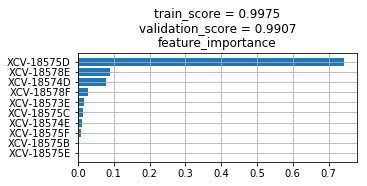

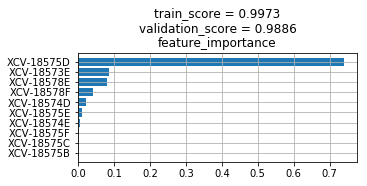

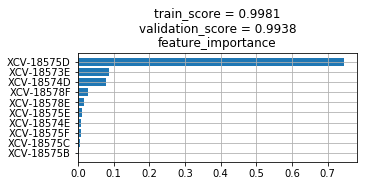

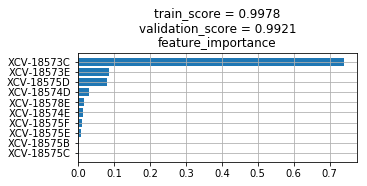

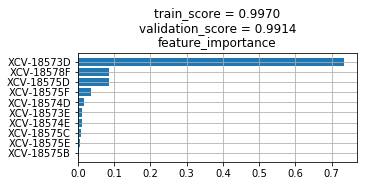

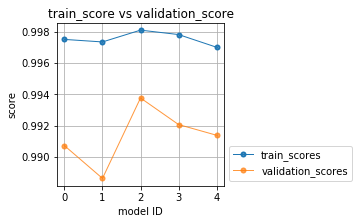

In [24]:
models = cross_validate(df_train_X.values, df_train_y.values, 3, 20, df_train_X)

In [25]:
# output ensemble mean value from rach models developed by cross-validation
def def_pred_ensemble(model, df_trial):
    sum_predictedValue = 0
    for i in range(len(model)):
        sum_predictedValue = sum_predictedValue + model[i].predict(df_trial)

    pred_ensemble = sum_predictedValue/len(model)
    return pred_ensemble

In [26]:
pred_ensemble = def_pred_ensemble(models, df_trial_X)
pred_ensemble

array([  0.        ,   0.        ,   0.8569016 ,  12.97753464,
        29.88327604,  59.63011367,  92.27069009, 100.        ,
        97.22185764,  58.33165487,  11.10999216,   0.        ,
         0.        ,   0.        ,   0.86134051,  13.01350478,
        30.36698432,  36.31444796,  80.83186832,  61.11200523,
        89.08032736,  58.33165487,  11.11021112,   0.        ,
         0.        ,   0.        ,   0.2213786 ,   3.31954278,
         6.89002748,   4.71920959,   3.72411506,  41.66834282,
        86.10524706,  58.27621121,  16.85106073,   0.        ,
         1.45075018,   0.        ,   0.15172635,   2.30470862,
         4.6660581 ,   3.17690179,   3.38807869,  41.66834282,
        88.89000784, 100.        ,  97.22185661,  58.33165487,
        11.10999216,   0.        ,   0.14766882,   2.22849319,
         4.53165139,   3.07344054,   3.373291  ,  41.66834282,
        88.89000784, 100.        ,  97.22181316,  58.33165487,
        11.10999216,   0.        ,   0.13528525,   2.18

In [27]:
from sklearn.metrics import r2_score

# output R2 score of rach models developed by cross-validation
def def_score_ensemble(model, df_trial_X, df_trial_y):
    for i in range(len(model)):
        print("model_"+ '{}'.format(i) +" "+ "score:", "{:.3f}".format(model[i].score(df_trial_X,df_trial_y)))
    
    score_predictedEnsemble = r2_score(def_pred_ensemble(models, df_trial_X),df_trial_y)
    print('ensemble score: {:.3f}'.format(score_predictedEnsemble))
    return score_predictedEnsemble

In [28]:
print("R2 Score for Trial Dataset")
score_predictedEnsemble = def_score_ensemble(models, df_trial_X, df_trial_y)

R2 Score for Trial Dataset
model_0 score: 0.998
model_1 score: 0.995
model_2 score: 0.996
model_3 score: 0.996
model_4 score: 0.997
ensemble score: 0.997


## 5.Result

In [29]:
x = df_trial_X.index

trial_score:0.997
RMSE: 1.983


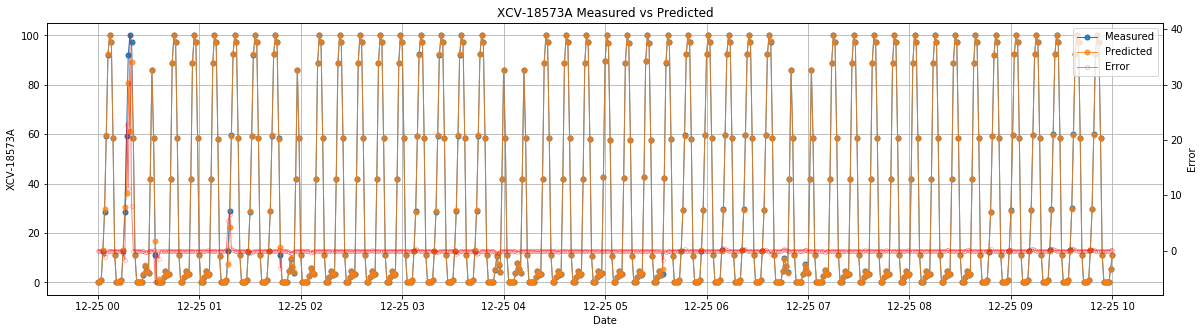

In [30]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

ax1.plot(x, df_trial_y.values.reshape(-1,1),"-",label="Measured", lw=1, marker='o', markersize=2, markeredgewidth=4)
ax1.plot(x, pred_ensemble,"-",label="Predicted", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4)
ax2.plot(x, df_trial_y.values.reshape(-1,1) - pred_ensemble.reshape(-1,1),"-r",label="Error", alpha=0.5, lw=1, marker='o', markersize=0.5, markeredgewidth=4)

ax1.set_title('XCV-18573A Measured vs Predicted')
ax1.set_xlabel('Date')
ax1.set_ylabel('XCV-18573A')
ax2.set_ylabel('Error')
ax1.grid()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="best")

print("trial_score:{:.3f}".format(score_predictedEnsemble))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(df_trial_y, pred_ensemble)))

In [31]:
with open('model_info_xcv18573a.pkl', mode='wb') as f:
    pickle.dump(models, f)